# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [44]:
# Dependencies and Setup
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression 
from datetime import datetime
import datetime as dt

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

#save the file
output_data_file = "output_data/cities.csv"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [4]:
datetime.utcfromtimestamp(1669821475).strftime('%d-%m-%Y %H:%M:%S')

'30-11-2022 15:17:55'

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ponta do sol
Processing Record 2 of Set 1 | pisco
Processing Record 3 of Set 1 | watrous
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | turukhansk
Processing Record 6 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 7 of Set 1 | dunedin
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | walvis bay
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | touros
Processing Record 15 of Set 1 | gambela
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | yeppoon
Processing Record 19 of Set 1 | anloga
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | tual
Processing Record 22 of Set

City not found. Skipping...
Processing Record 40 of Set 4 | esperance
Processing Record 41 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 42 of Set 4 | mandalgovi
Processing Record 43 of Set 4 | khurda
Processing Record 44 of Set 4 | svetlogorsk
Processing Record 45 of Set 4 | lompoc
Processing Record 46 of Set 4 | vila franca do campo
Processing Record 47 of Set 4 | vila do maio
Processing Record 48 of Set 4 | ixtapa
Processing Record 49 of Set 4 | williston
Processing Record 0 of Set 5 | grindavik
Processing Record 1 of Set 5 | carbonia
Processing Record 2 of Set 5 | broken hill
Processing Record 3 of Set 5 | half moon bay
Processing Record 4 of Set 5 | ancud
Processing Record 5 of Set 5 | banyo
Processing Record 6 of Set 5 | pokosnoye
Processing Record 7 of Set 5 | zykovo
Processing Record 8 of Set 5 | beyneu
Processing Record 9 of Set 5 | ventspils
Processing Record 10 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 5 | imbituba
Processin

Processing Record 30 of Set 8 | viedma
Processing Record 31 of Set 8 | requena
Processing Record 32 of Set 8 | nome
Processing Record 33 of Set 8 | kuah
Processing Record 34 of Set 8 | san miguel
Processing Record 35 of Set 8 | bitola
Processing Record 36 of Set 8 | altay
Processing Record 37 of Set 8 | chifeng
Processing Record 38 of Set 8 | yerbogachen
Processing Record 39 of Set 8 | qaqortoq
Processing Record 40 of Set 8 | xai-xai
Processing Record 41 of Set 8 | merrill
Processing Record 42 of Set 8 | marzuq
Processing Record 43 of Set 8 | carmo do paranaiba
Processing Record 44 of Set 8 | merauke
Processing Record 45 of Set 8 | komsomolskiy
Processing Record 46 of Set 8 | belmonte
Processing Record 47 of Set 8 | mount gambier
Processing Record 48 of Set 8 | ilulissat
Processing Record 49 of Set 8 | comodoro rivadavia
Processing Record 0 of Set 9 | jaramana
City not found. Skipping...
Processing Record 1 of Set 9 | muzhi
Processing Record 2 of Set 9 | durban
Processing Record 3 of S

Processing Record 18 of Set 12 | mahon
Processing Record 19 of Set 12 | sungairaya
Processing Record 20 of Set 12 | manaia
Processing Record 21 of Set 12 | kupang
Processing Record 22 of Set 12 | balimo
City not found. Skipping...
Processing Record 23 of Set 12 | souillac
Processing Record 24 of Set 12 | kovur
Processing Record 25 of Set 12 | mackay
Processing Record 26 of Set 12 | escanaba
Processing Record 27 of Set 12 | paamiut
Processing Record 28 of Set 12 | rumonge
Processing Record 29 of Set 12 | harpanahalli
Processing Record 30 of Set 12 | hihifo
City not found. Skipping...
Processing Record 31 of Set 12 | kralendijk
Processing Record 32 of Set 12 | rong kwang
Processing Record 33 of Set 12 | bongandanga
Processing Record 34 of Set 12 | bay city
Processing Record 35 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 12 | sangar
Processing Record 37 of Set 12 | vysokogornyy
Processing Record 38 of Set 12 | fayaoue
Processing Record 39 of Set 12 | naze
P

In [8]:
# Convert raw data to dataframe.
city_data_df = pd.DataFrame(city_data)

#show count
city_data_df.count()


City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ponta do sol,32.6667,-17.1000,289.50,59,8,3.64,PT,1670041187
1,pisco,-13.7000,-76.2167,291.18,82,0,1.03,PE,1670041187
2,watrous,51.6668,-105.4679,248.03,77,19,6.17,CA,1670041187
3,mataura,-46.1927,168.8643,289.51,54,95,3.54,NZ,1670041188
4,turukhansk,65.8167,87.9833,257.43,96,100,4.51,RU,1670041188


In [10]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,19.749645,17.809182,284.683498,74.512367,59.913428,3.444629,1.670041e+09
std,32.613672,92.083131,15.733299,19.108512,40.845852,2.612700,6.432878e+01
min,-54.800000,-179.166700,233.440000,10.000000,0.000000,0.000000,1.670041e+09
25%,-5.592175,-65.081525,274.155000,65.000000,13.000000,1.540000,1.670041e+09
50%,22.384400,20.197200,289.400000,78.000000,75.000000,2.820000,1.670041e+09
75%,46.370725,100.349575,297.422500,88.000000,100.000000,4.505000,1.670041e+09
max,78.218600,179.316700,312.140000,100.000000,100.000000,14.400000,1.670041e+09


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ponta do sol,32.6667,-17.1000,289.50,59,8,3.64,PT,1670041187
1,pisco,-13.7000,-76.2167,291.18,82,0,1.03,PE,1670041187
2,watrous,51.6668,-105.4679,248.03,77,19,6.17,CA,1670041187
3,mataura,-46.1927,168.8643,289.51,54,95,3.54,NZ,1670041188
4,turukhansk,65.8167,87.9833,257.43,96,100,4.51,RU,1670041188


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [13]:
from datetime import datetime
dateTimeObj = datetime.now()
datestamp = dateTimeObj.strftime("%d-%m-%y")
datestamp 

'03-12-22'

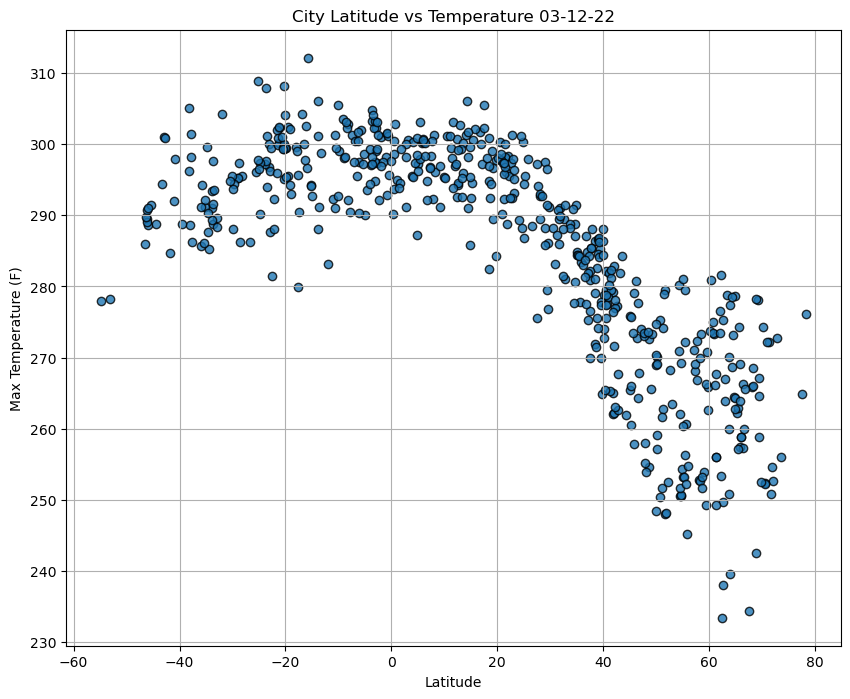

In [49]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Temperature {datestamp}")
plt.grid()

# Save the figure
plt.savefig("Images/latitude_vs_temperature.png", bbox_inches="tight")

# Show plot
plt.show()

Cities closer to the equator have a higher temperature, meaning it will be hot. The further away the city is from the equator, the colder it will be.

#### Latitude Vs. Humidity

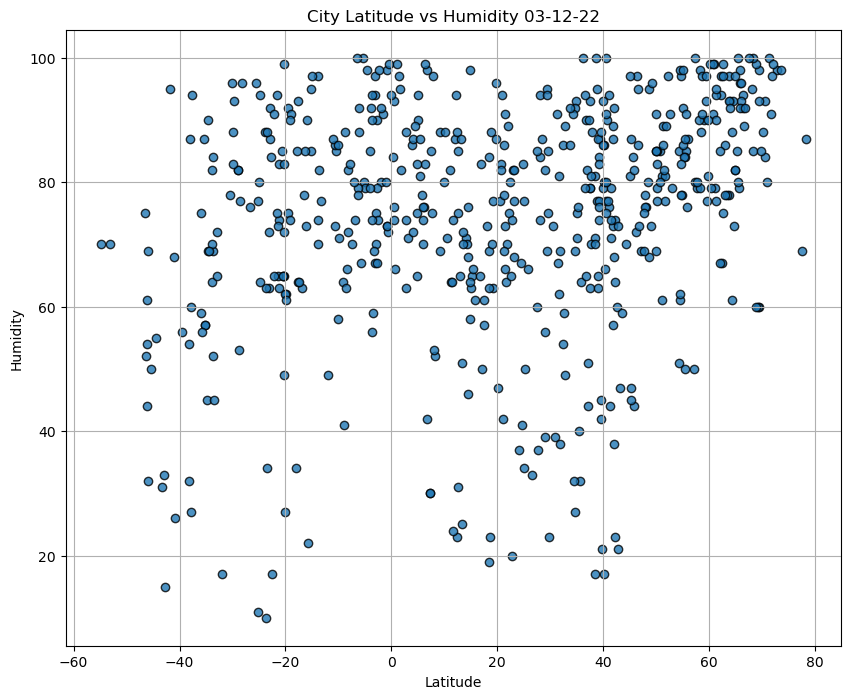

In [50]:
# code for a scatter plot for latitude vs humidity.
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'City Latitude vs Humidity {datestamp}')
plt.grid()
plt.savefig("Images/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()


There is no connection between the humidity and the position of the city in relation to the how far it is away from the equator. 

#### Latitude Vs. Cloudiness

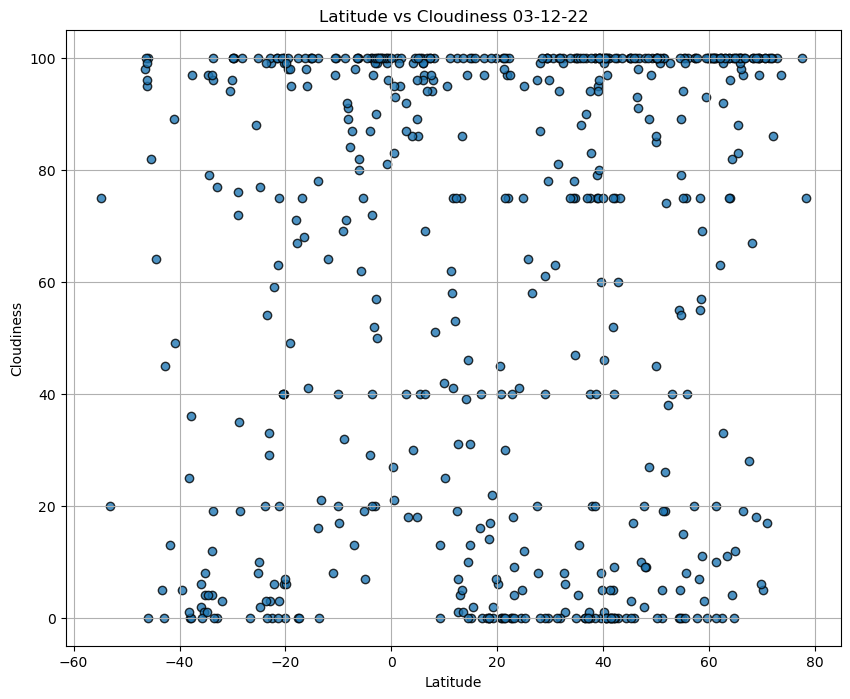

In [51]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs Cloudiness {datestamp}')
plt.grid()

# Save the figure
plt.savefig("Images/latitude_vs_cloudiness.png", bbox_inches="tight")

# Show plot
plt.show()


The scatter plot shows there is no significant relation between where the city is located and the density of clouds. 

#### Latitude vs. Wind Speed Plot

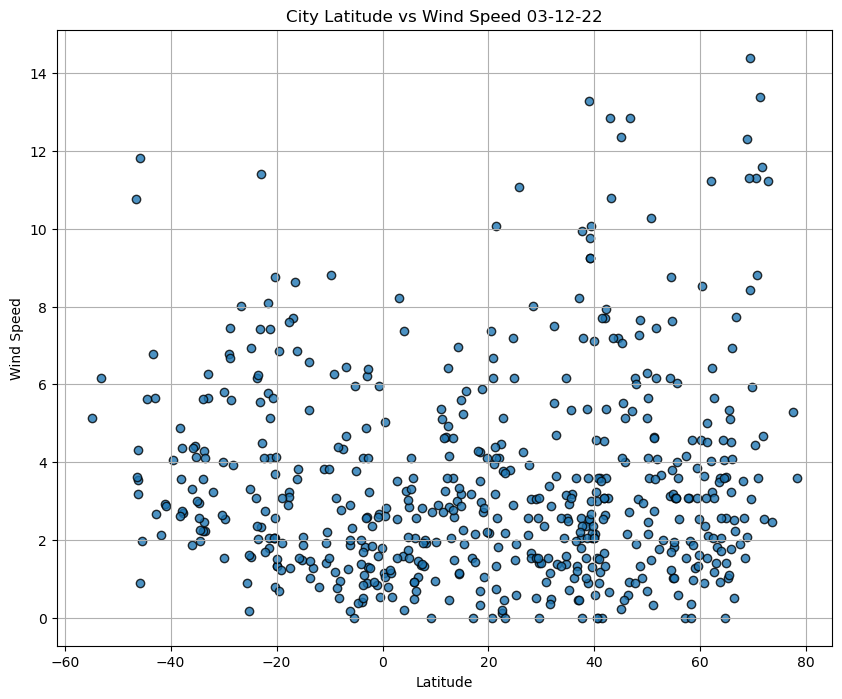

In [17]:
# Build the scatter plots for latitude vs. wind speed
# Create a scatter plot for latitude vs wind speed.
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs Wind Speed {datestamp}')
plt.grid()

# Save the figure
plt.savefig("Images/latitude_vs_wind_speed.png", bbox_inches="tight")

#Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Generate dataframe only for cities in Northern Hemisphere
north_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ponta do sol,32.6667,-17.1000,289.50,59,8,3.64,PT,1670041187
2,watrous,51.6668,-105.4679,248.03,77,19,6.17,CA,1670041187
4,turukhansk,65.8167,87.9833,257.43,96,100,4.51,RU,1670041188
6,ribeira grande,38.5167,-28.7000,286.36,71,100,5.36,PT,1670041188
12,gambela,8.2500,34.5833,296.15,52,51,1.93,ET,1670041190


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pisco,-13.7000,-76.2167,291.18,82,0,1.03,PE,1670041187
3,mataura,-46.1927,168.8643,289.51,54,95,3.54,NZ,1670041188
5,dunedin,-45.8742,170.5036,288.60,69,100,0.89,NZ,1670041188
7,castro,-24.7911,-50.0119,290.14,94,77,1.55,BR,1670041189
8,vaini,-21.2000,-175.2000,302.24,74,20,5.14,TO,1670041189


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7096280837061333
The correlation between both factors is -0.84


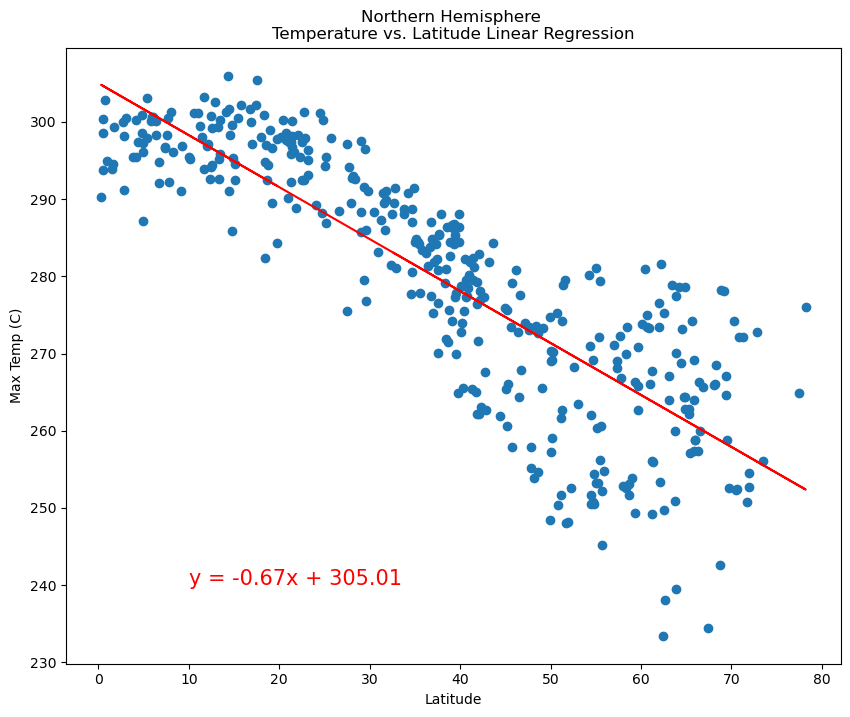

In [45]:
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Max Temp"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = 10,240
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp (C)")
    plt.title("Northern Hemisphere \nTemperature vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig("Images/north_temp_vs_lat.png", bbox_inches="tight")
    plt.show()
    
plotlinearregression(x_values, y_values, "Max Temp")

The r-value is: 0.21105448191729054
The correlation between both factors is 0.46


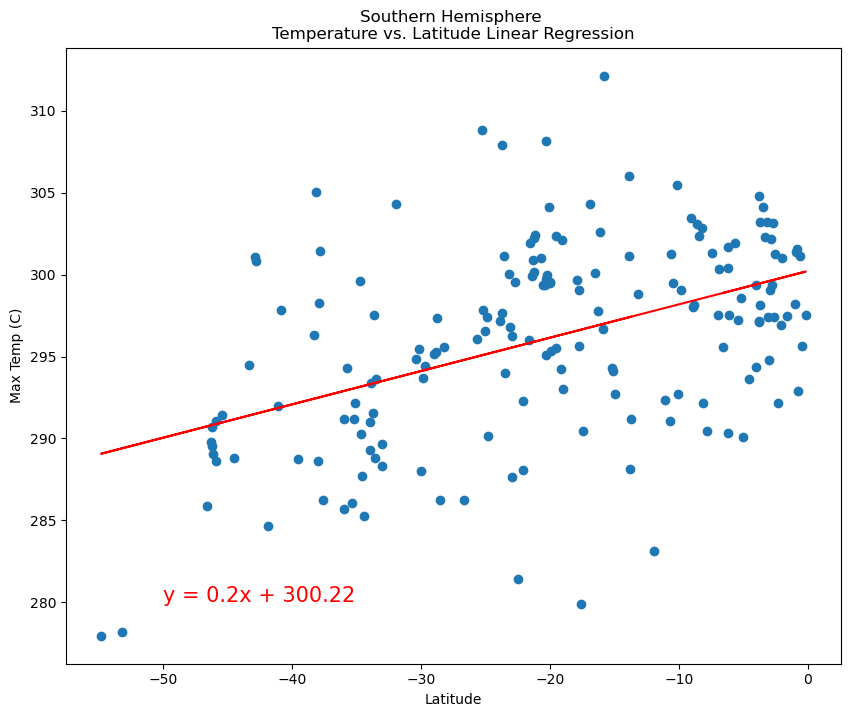

<Figure size 1000x800 with 0 Axes>

In [46]:
# Linear regression on Southern Hemisphere
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Max Temp"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -50,280
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp (C)")
    plt.title("Southern Hemisphere \nTemperature vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
   
    #plt.figure(figsize=(4,4))
    plt.show()
    plt.savefig("Images/south_temp_vs_lat.png")#, bbox_inches="tight")
    
    
plotlinearregression(x_values, y_values, "Max Temp")

**<ins>Discussion about the linear relationship:<ins/>**  

The linear regression lines and correlation values between latitude (north and south) and maximum temperature show that city latitude is correlated to temperature. This proves the point I had mentioned earlier. The further away we go from the equater(latitude 0) the maximum Temperature (F) will decrease. The closer we get to the equater(latitude 0) the maximum Temperature (F) will increase.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0862724579763
The correlation between both factors is 0.29


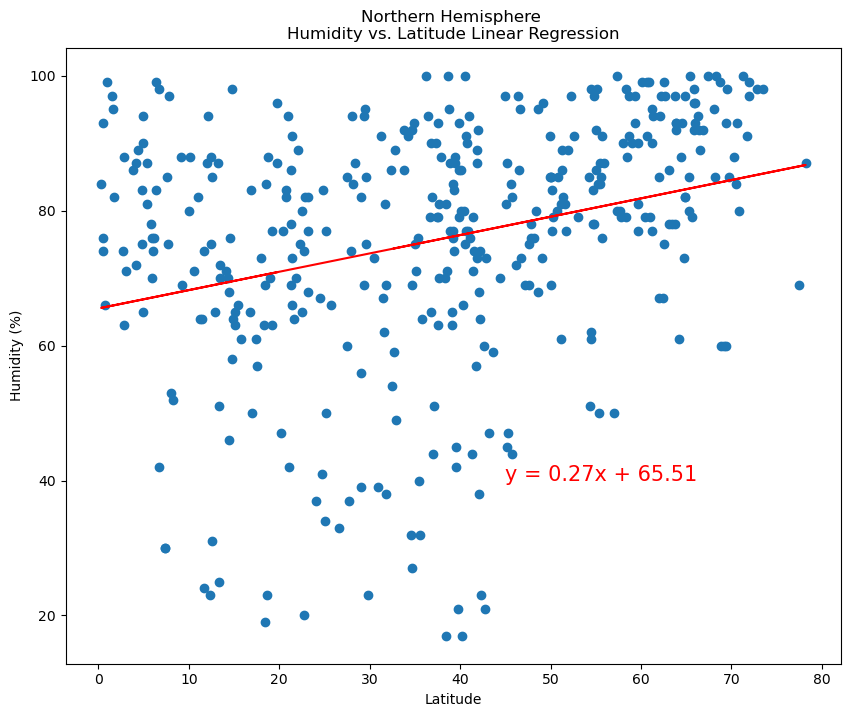

<Figure size 1000x800 with 0 Axes>

In [47]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere - Humidity Vs Latitiude

x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Humidity"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = 45,40
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    plt.title("Northern Hemisphere \nHumidity vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Humidity")
plt.savefig("Images/North_Humidity_vs_lat.png", bbox_inches="tight")
plt.show()

The r-value is: 0.11416657505042466
The correlation between both factors is 0.34


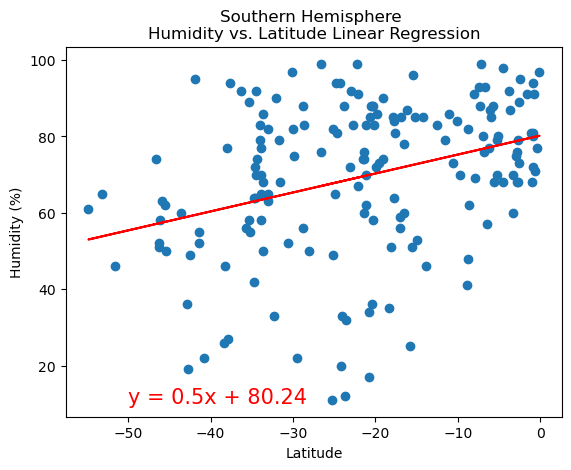

<Figure size 640x480 with 0 Axes>

In [42]:
# Southern Hemisphere
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Humidity"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -50,10
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    plt.title("Southern Hemisphere \nHumidity vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()

plotlinearregression(x_values, y_values, "Humidity")
plt.savefig("Images/south_humidity_vs_lat.png", bbox_inches="tight")
plt.show()


**<ins>Discussion about the linear relationship:<ins/>** 

The above figures show that there is a weak correlation between city location and humidity in a particular area. Humidty can not be measured or predicted when making connections with the Latitude (location). 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.012047465943613197
The correlation between both factors is 0.11


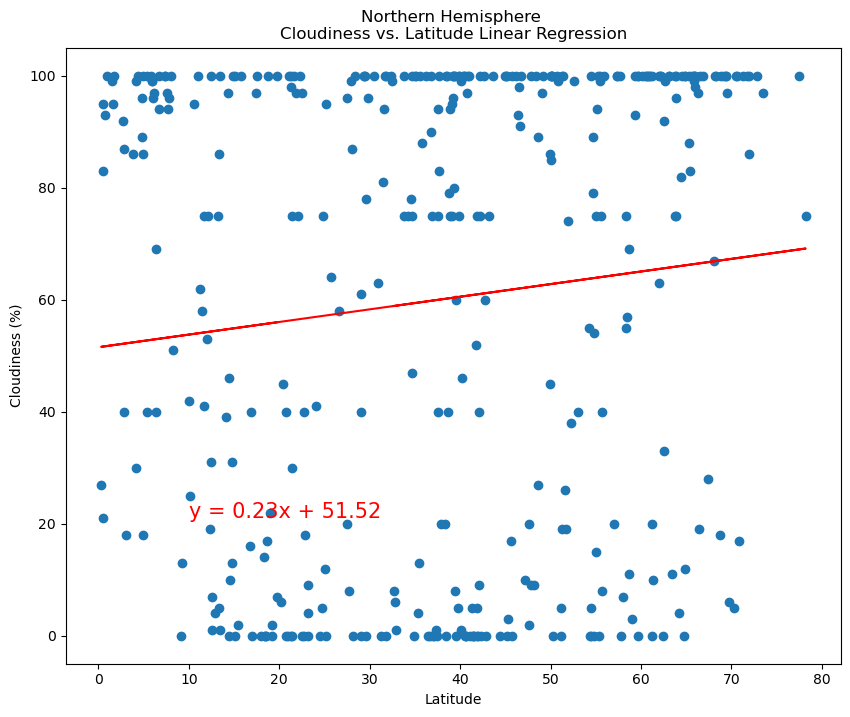

<Figure size 1000x800 with 0 Axes>

In [48]:
# Northern Hemisphere
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Cloudiness"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = 10,21
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness (%)")
    plt.title("Northern Hemisphere \nCloudiness vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Cloudiness")
plt.savefig("Images/Northern Cloudiness_vs_lat.png", bbox_inches="tight")
plt.show()


The r-value is: 0.06587130150891957
The correlation between both factors is 0.26


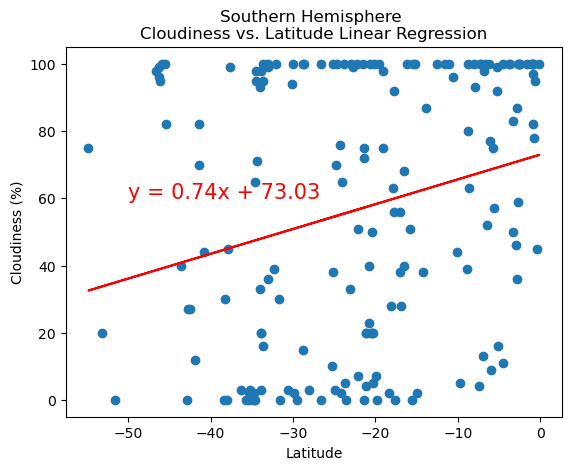

<Figure size 640x480 with 0 Axes>

In [51]:
# Southern Hemisphere
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Cloudiness"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -50,60
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness (%)")
    plt.title("Southern Hemisphere \nCloudiness vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Cloudiness")
plt.savefig("Images/Southern_Hemisphere_Cloudiness_vs_Lat.png", bbox_inches="tight")
plt.show()

**<ins>Discussion about the linear relationship:<ins/>** 

The above figures show that there is a weak correlation between city location and cloudiness. The cloudiness can not be measured or predicted when making connections with the Latitude (location). 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04176221798690403
The correlation between both factors is 0.2


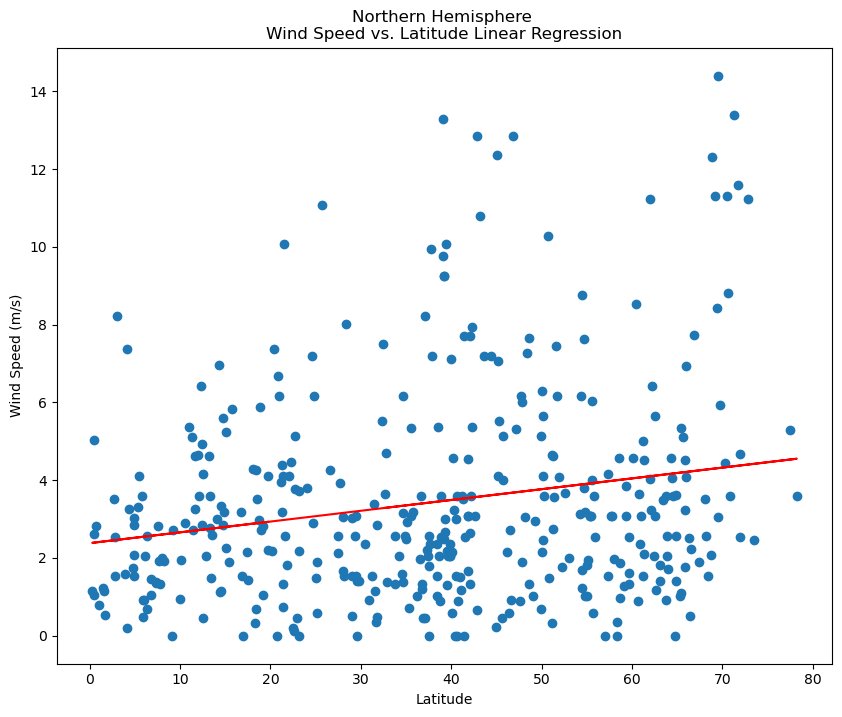

<Figure size 1000x800 with 0 Axes>

In [53]:
# Northern Hemisphere
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Wind Speed"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -40,10
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)")
    plt.title("Northern Hemisphere \nWind Speed vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Wind Speed")
plt.savefig("Images/Northern_Hemisphere_Wind_Speed_vs_lat.png", bbox_inches="tight")
plt.show()

The r-value is: 0.08173122642341475
The correlation between both factors is -0.29


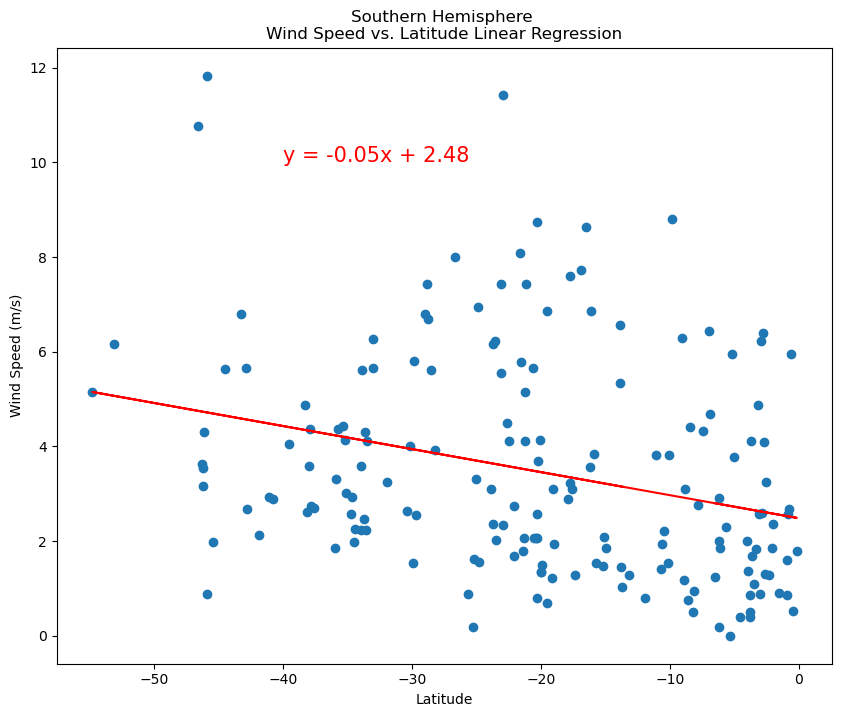

<Figure size 1000x800 with 0 Axes>

In [52]:
# Southern Hemisphere
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Wind Speed"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -40,10
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)")
    plt.title("Southern Hemisphere \nWind Speed vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Wind Speed")
plt.savefig("Images/Southern_Hemisphere_Wind_Speed_vs_lat.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** 

The above figures show that there is a weak correlation between city location and wind speed. The wind speed can not be measured, defined or predicted when making connections with the Latitude (location). 